# Task 2

For this task, download the modified version of the Yale Face Database B provided on Moodle (task2_data.zip). The Yale Face Database B consists of single light source images of 10 subjects, each seen in different poses and illuminationconditions. In the provided form the database is divided into 5 subsets. In subset 0 the subject is illuminated by an almost frontal light source, while for subsets 1-4 the
light source is gradually moved along the horizon. Subset 0 will serve as the training set, while subsets 1-4 are used for testing.

## Part 1

Write a function that takes as an input matrix T of vectorized images from subset 0. The output of this function are the 20 first singular vectors U[:; 1]; : : : ;U[:; 20].Display the first 3 vectors as images, i.e., reshape them to size 50*50 and display them.

In [1]:
import os
import numpy as np
import imageio
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN

##### Define directory and image shape

In [2]:
train_path = './yaleBfaces/subset0/'
test_path = ['./yaleBfaces/subset1/','./yaleBfaces/subset2/','./yaleBfaces/subset3/','./yaleBfaces/subset4/']
img_rows = 50
img_columns = 50
num_vectors= 20

##### 1.The function that reads in images from subset 0 and returns vectorized matrix of images T.

In [3]:
def import_images(path, img_rows, img_columns):
    
    images = os.listdir(path)
    n = len(images)   
    m = img_rows*img_columns
    
    T = np.zeros((m, n))   
    T_labels = np.zeros((1,n))
    
    for i_image, image_name in enumerate(images):
        
        T_labels[0,i_image] = int(image_name[6:8])
        T[:,i_image] = np.array(imageio.imread(path+image_name)).astype(np.float64).ravel()/255
       
    return T, T_labels

##### 2.The function that takes as an input matrix T of vectorized images and returns singular vectors.

In [4]:
def PCA_SVD(T,num_vectors):
    T_mean = np.mean(T,axis=1)
    T_mean = np.reshape(T_mean,(img_rows*img_columns,1))
    T_centered = T - T_mean
    
    u,s,v = np.linalg.svd(T_centered)
    u = u[:,:num_vectors]
    return u

##### 3. Get singular vectors of training images and plot the first 3

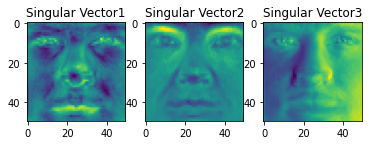

In [5]:
T_train,T_train_labels = import_images(train_path, img_rows, img_columns)

# get the 20 singular vectors
T_singular_vectors = PCA_SVD(T_train,num_vectors)

# plot first 3 singular vectors

for i, vector in enumerate(T_singular_vectors[:,:3].T, 1):
    plt.subplot(1, 3, i)
    plt.imshow(vector.reshape(img_rows,img_columns))
    plt.title('Singular Vector{}'.format(i))
plt.show()

## Part 2

Write a function that takes as an input the training set T (a matrix composed of vectorized pictures from subset 0), a vector containing the labels of the training set (i.e., if the the i-th sample belongs to class j, the i-th entry of the labels vector is j. In this exercise j is an integer between 1 and 10), the test samples S (a matrix composed of vectorized pictures from subsets 1-4) and the corresponding labels (in a separate vector), the 20 singular vectors from the first step, and the parameter k that denotes how many of the PCs are used. Use the Euclidean distance to classify each sample image based on its three nearest neighbors. (This is done by comparing the test samples with the training samples in the reduced space.) As an output give the fraction of images from S that were misclassified,i.e., the error rate. Repeat this for subsets 1 through 4 and for k = 1; : : : ; 20.Plot the error rate for each subset.

##### 1.The function that calculates the error rate 

In [6]:
def error_rate_knn(T,T_labels,S,S_labels,T_singular_vectors,K):
        
    PC = np.transpose(T_singular_vectors[:,:K])
    T_reduced =np.dot(PC,T)
    S_reduced =np.dot(PC,S)
    neigb = KNN(n_neighbors=3,p=2)
    neigb.fit(np.transpose(T_reduced),T_labels.ravel())
    error_rate = 1-neigb.score(np.transpose(S_reduced),S_labels.ravel()) 
    
    return error_rate

##### 2.Classify different subsets of data 

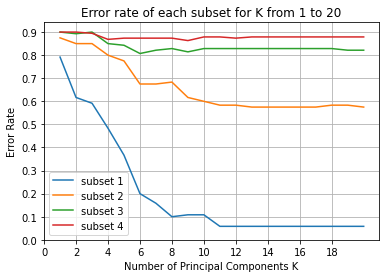

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

error_rate_result = np.zeros((4,20))
for K in range(1,21):
    for j in range(1,5):        
        T,T_labels = import_images(train_path, img_rows, img_columns)
        S,S_labels= import_images(test_path[j-1], img_rows, img_columns)
        error_rate_result[j-1,K-1] = error_rate_knn(T,T_labels,S,S_labels,T_singular_vectors,K)

x = np.arange(1,21,1)
for i in range(4):
    plt.plot(x,error_rate_result[i,:])

plt.title('Error rate of each subset for K from 1 to 20')
plt.ylabel('Error Rate')
plt.xlabel('Number of Principal Components K')
plt.legend(['subset 1','subset 2','subset 3','subset 4'])

ax.set_xticks(np.arange(0, 20, 2))
ax.set_yticks(np.arange(0, 1, 0.1))
plt.grid()
plt.show()

## Part 3 

Repeat the above experiment without using the first three singular vectors, i.e.,use k = 1; : : : ; 17 singular vectors starting from the 4-th. Plot the error rate asbefore. How do you explain the difference in recognition rate?

#####  Repeat experiment without using the first three Principal Components

In [8]:
U_new = T_singular_vectors[:,3:]
error_rate_result_new = np.zeros((4,17))
for K in range(1,18):
    for j in range(1,5):
        T,T_labels = import_images(train_path, img_rows, img_columns)
        S,S_labels= import_images(test_path[j-1], img_rows, img_columns)
        error_rate_result_new[j-1,K-1] = error_rate_knn(T,T_labels,S,S_labels,U_new,K)
        

Text(0.5, 1.0, 'Error rate of each subset for K from 1 to 20')

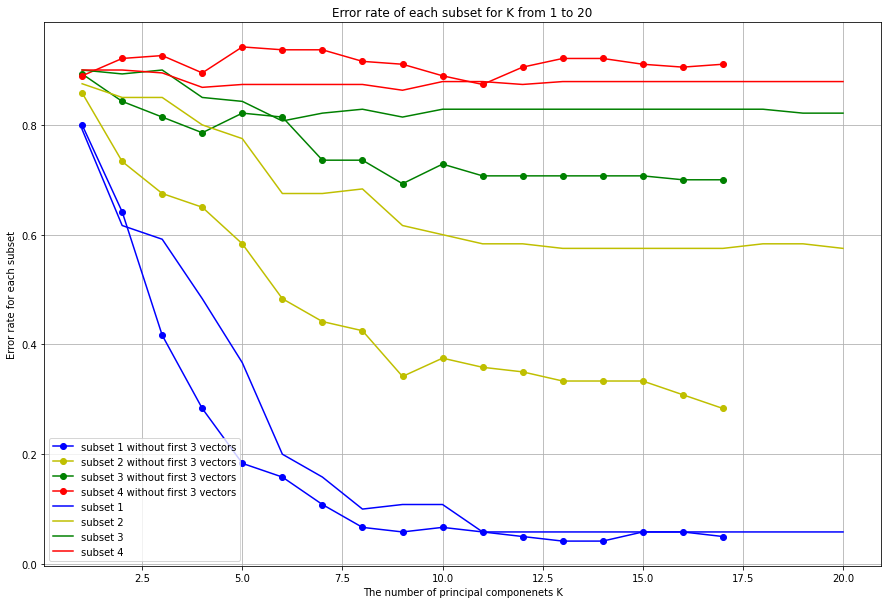

In [9]:
#PLOT
x_1 = np.arange(1,18,1)
x_2 = np.arange(1,21,1)
y_1 = error_rate_result_new[0,:]
y_2 = error_rate_result_new[1,:]
y_3 = error_rate_result_new[2,:]
y_4 = error_rate_result_new[3,:]
y_5 = error_rate_result[0,:]
y_6 = error_rate_result[1,:]
y_7 = error_rate_result[2,:]
y_8 = error_rate_result[3,:] 
plt.figure(figsize=(15,10))
plt.plot(x_1,y_1,'-ob')
plt.plot(x_1,y_2,'-oy')
plt.plot(x_1,y_3,'-og')
plt.plot(x_1,y_4,'-or')
plt.plot(x_2,y_5,'b')
plt.plot(x_2,y_6,'y')
plt.plot(x_2,y_7,'g')
plt.plot(x_2,y_8,'r')
plt.xlabel('The number of principal componenets K')
plt.ylabel('Error rate for each subset')
plt.grid()
plt.legend(['subset 1 without first 3 vectors','subset 2 without first 3 vectors','subset 3 without first 3 vectors','subset 4 without first 3 vectors','subset 1','subset 2','subset 3','subset 4'],loc=3)
plt.title('Error rate of each subset for K from 1 to 20')

## Conclusion and Analysis 

The fact is that the second experiment (without the first three vectors) had a lower error rate than the first, meaning that the recognition is better without the first three vectors. The reason for this situation, we suspect, is that these three vectors contain some external information that is not relevant for facial recognition, in this case perhaps the lighting conditions. Instead of helping facial recognition, this information caused interference in facial recognition, so dropping such information resulted in a higher accuracy rate instead.
